# Identificación de Fases en KDD y CRISP-DM

**Proceso en KDD**

4. **Mineria de datos:** Considero que la fase mas importante es la minería de datos, en esta etapa se pueden encontrar patrones y descubrir conocimientos útiles. En el caso de análisis de cliente que podrían tornarse en morosos, esta etapa permite aplicar algoritmo para identificar patrones ocultos, como las variables “Consumo de GB”, “Reclamos” y “Estado_Cuenta”. A partir de estos datos se pueden descubrir futuros clientes morosos.

**Proceso de CRISP-DM**

3. **Preparación de los datos:** Siguiendo con el mismo ejemplo, considero que la fase mas relevante es la preparación de los datos, ya que los próximos análisis estadísticos u modelos, van a alimentarse de este conjunto de datos. En esta etapa, se realiza la limpieza y transformación de variables categóricas en datos numéricos utilizando librerías como LabelEncoder o get_dummies.
Esta etapa permite que los análisis y modelos posteriores trabajan con datos precisos y coherentes, evitando posibles sesgos, y asegurando una información de calidad.



# Librerias

In [1]:
#Importacion de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
# Crear DataFrame con los datos del ejercicio
datos = {
"Cliente": [1, 2, 3, 4, 5],
"Edad": [25, 40, 32, 22, 35],
"Plan": ["Básico", "Premium", "Estándar", "Básico", "Premium"],
"Consumo_GB": [5, 50, 10, 7, 45],
"Reclamos": [1, 0, 2, 3, 0],
"Estado_Cuenta": ["Pagado", "Pagado", "Moroso", "Moroso", "Pagado"]
} 

df = pd.DataFrame(datos)


In [3]:
#Visualizacion del dataset
df.head()

,Cliente,Edad,Plan,Consumo_GB,Reclamos,Estado_Cuenta
0,1,25,Básico,5,1,Pagado
1,2,40,Premium,50,0,Pagado
2,3,32,Estándar,10,2,Moroso
3,4,22,Básico,7,3,Moroso
4,5,35,Premium,45,0,Pagado


### Dimension del dataset

In [4]:
# Utilizamos el método .shape para obtener las dimensiones del data frame: cantidad de filas (5) y columnas (6)
df.shape

(5, 6)

# Variables

### Descripción general del dataset
El dataset brinda información sobre un conjunto de clientes de una proveedora de internet. Contiene variables relacionadas con datos personales del cliente, el plan de internet contratado, el servicio al consumidor (medido por reclamos) y el estado de cuenta.

### Nombre de las variables

In [5]:
#Obtengo nombre de las columnas
df.columns

Index(['Cliente', 'Edad', 'Plan', 'Consumo_GB', 'Reclamos', 'Estado_Cuenta'], dtype='object')

### Descripcion de las variables
- Cliente: Clave o ID que identifica al cliente. 
- Edad: Edad del cliente actual. Variable cuantitativa discreta                                                                     
- Plan: Tipo de plan de internet contrado por el cliente. Variable categorica con 3 niveles: 'Basico','Estandar' y 'Premium'
- Consumo_GB: Cantidad de gigabytes que consume el internet. Variable cuantitativa discreta.
- Reclamos: Cantidad de reclamos del cliente sobre el servicio. Variable cuantitativa discrea.
- Estado_Cuenta: Estado actual del pago del servicio. Variable categorica con 2 niveles: 'Activo' y 'Moroso'

### Tipo de datos

In [6]:
# Exploramos los tipos de datos de cada columna
df.dtypes

Cliente           int64
Edad              int64
Plan             object
Consumo_GB        int64
Reclamos          int64
Estado_Cuenta    object
dtype: object

In [7]:
# Inspeccionar los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cliente        5 non-null      int64 
 1   Edad           5 non-null      int64 
 2   Plan           5 non-null      object
 3   Consumo_GB     5 non-null      int64 
 4   Reclamos       5 non-null      int64 
 5   Estado_Cuenta  5 non-null      object
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes
None


# 2. Preprocesamiento de Datos
## Valores Inconsistentes
Afortunadamente, el dataset no muestra registros con valores nulos o datos duplicados, por ende no hace falta una limpieza o una transformacion para completar los registros vacios.

### Cantidad de valores nulos por columna

In [8]:
df.isnull().sum()

Cliente          0
Edad             0
Plan             0
Consumo_GB       0
Reclamos         0
Estado_Cuenta    0
dtype: int64

### Cantidad de datos duplicados

In [9]:
df.duplicated().sum()

0



## Transformacion de variables categoricas
Los modelos de aprendizaje requieren datos numericos, sin embargo, el dataset actual cuenta con variables categoricas y es necesario una transformacion. En la transformacion del dataset se optaron por las librerias pandas y sklearn, los metodos a utilizar se aplican en base a la cantidad de variables distintas que guarde la columna en cuestion, en caso de 2 valores se recurre al metodo get_dummie, caso contrario se utiliza LabelEncoder.

### Variables categoricas binarias

In [10]:
#Se utiliza la funcion get_dummies de pandas en columnas con dos valores
df2 = pd.get_dummies(df, columns=["Estado_Cuenta"]) #Se utiliza la libreria pandas (pd) y se especifica la columna

for columna in df2.columns:
    if df2[columna].dtype == 'bool':
        df2[columna] = df2[columna].astype(int) #Se reemplzan los valores Falses y True por datos numericos (0 y 1)
        
df2

,Cliente,Edad,Plan,Consumo_GB,Reclamos,Estado_Cuenta_Moroso,Estado_Cuenta_Pagado
0,1,25,Básico,5,1,0,1
1,2,40,Premium,50,0,0,1
2,3,32,Estándar,10,2,1,0
3,4,22,Básico,7,3,1,0
4,5,35,Premium,45,0,0,1


### Variables con más de dos categorías

In [12]:
from sklearn.preprocessing import LabelEncoder #Importamos una funcion de la libreria sklearn.preprocessing
# El orden numericodepende del orden alfabetico, es una buena practica conocer el alfabetico y anotar en alguna parte
# la referencia de cada numero.

In [13]:
encoder= LabelEncoder()

In [14]:
df2['Plan_codificado'] = encoder.fit_transform(df2['Plan']) #Se agrega una nueva columna Plan_codificado
df2 #Visualizacion del dataset despues de la pretransformacion, aun permaneca la columna Plan

,Cliente,Edad,Plan,Consumo_GB,Reclamos,Estado_Cuenta_Moroso,Estado_Cuenta_Pagado,Plan_codificado
0,1,25,Básico,5,1,0,1,0
1,2,40,Premium,50,0,0,1,2
2,3,32,Estándar,10,2,1,0,1
3,4,22,Básico,7,3,1,0,0
4,5,35,Premium,45,0,0,1,2


# Analisis estadistico

In [15]:
print(df.describe())

        Cliente       Edad  Consumo_GB  Reclamos
count  5.000000   5.000000    5.000000   5.00000
mean   3.000000  30.800000   23.400000   1.20000
std    1.581139   7.328028   22.142719   1.30384
min    1.000000  22.000000    5.000000   0.00000
25%    2.000000  25.000000    7.000000   0.00000
50%    3.000000  32.000000   10.000000   1.00000
75%    4.000000  35.000000   45.000000   2.00000
max    5.000000  40.000000   50.000000   3.00000


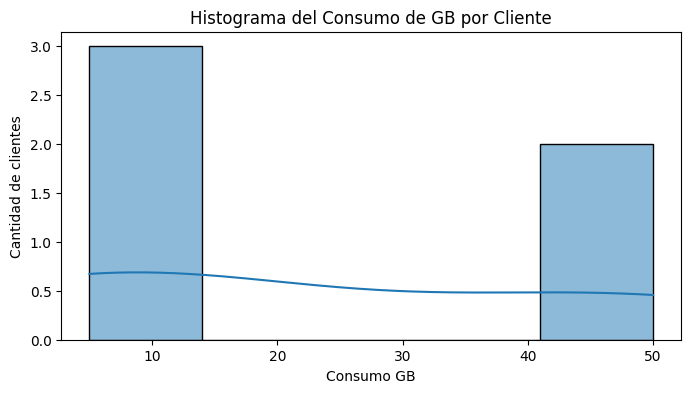

In [28]:
# Ver distribución de consumo de datos
plt.figure(figsize=(8, 4))
sns.histplot(df["Consumo_GB"], bins=5, kde=True)
plt.title('Histograma del Consumo de GB por Cliente')
plt.xlabel('Consumo GB')
plt.ylabel('Cantidad de clientes')
plt.show()

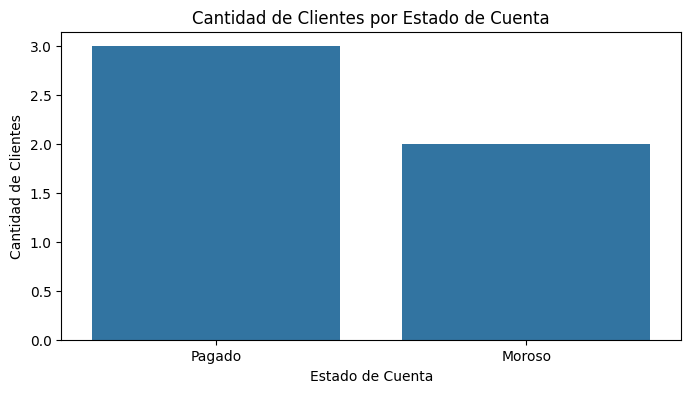

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Estado_Cuenta')
plt.title('Cantidad de Clientes por Estado de Cuenta')
plt.xlabel('Estado de Cuenta')
plt.ylabel('Cantidad de Clientes')
plt.show()

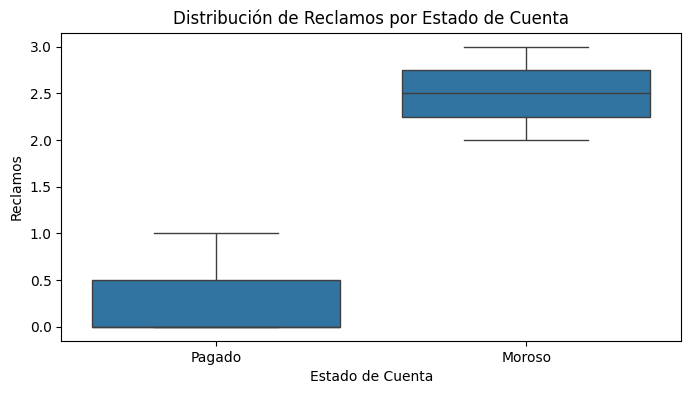

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Estado_Cuenta', y='Reclamos')
plt.title('Distribución de Reclamos por Estado de Cuenta')
plt.xlabel('Estado de Cuenta')
plt.ylabel('Reclamos')
plt.show()

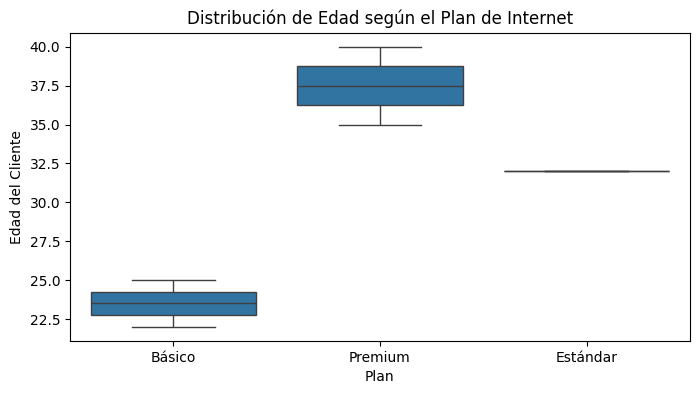

In [30]:
plt.figure(figsize=(8, 4))  #Me gusta que todos los graficos esten con el mismo tamaño en la medida de lo posible
sns.boxplot(data=df, x='Plan', y='Edad')
plt.title('Distribución de Edad según el Plan de Internet')
plt.xlabel('Plan')
plt.ylabel('Edad del Cliente')
plt.show()

# Interpretacion de Resultados

Gracias al analisis estadistico realizado, se pueden sacar algunas conclusiones relevantes como, el promedio de reclamos con respecto al servicio es de 1 y con un maximo 3, se observa que los clientes que han presentado mas de un reclamo suelen ser morosos. 

Respecto al consumo de gigabytes, el promedio normal de consumo es de 23gb y se destaca que los clientes que tienen un consumo menor o igual a 10gb suelen presentar al menos un reclamo al servicio de internet, sin embargo, el plan y estado de cuenta no reflejan una relacion. Aun asi, se puede destacar que, los clientes morosos presentan un consumo alrededor de 10gb, y por lo general han presentado dos o mas reclamos.

Por otro lado, se puede encontrar una relacion entre la edad de los clientes y el plan de internet contratado, los adultos que rondan los 20 años suelen contratar el plan mas basico y las personas alrededor de los 40 prefieren un plan premium. Esto sugiere que, los clientes mas jovenes suelen contratar un plan mas basico y economico, mientras que los clientes de edad mayor prefieren un servicio de mayor rendimiento.